In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import Symbol, Function, Eq, solve, I, collect, expand, simplify,\
                  Derivative, init_printing, series, evaluate, together, symbols, diff
import warnings
warnings.filterwarnings('ignore')
init_printing()

1) Нарисуйте бифуркационную диаграмму на плоскости (a,x), указав характер устойчивости ПР и тип его бифуркации
$\dot{x}=2(a^2 - x^2) - (a^2 + x^2)^2$

In [2]:
x = Symbol('x', real = True)
a = Symbol('a', real = True)
eq = Eq(2*(a**2-x**2)-(a**2+x**2)**2, 0)
eq

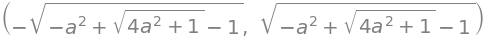

In [3]:
solution1 = solve(eq,x)[0]
solution2 = solve(eq,x)[1]
solution1, solution2

Рассмотрим условие для параметра a при котором есть ПР:

$-a^2 + \sqrt{4a^2 +1}-1 > 0$, Откуда получаем $a \in [-\sqrt{2}, \sqrt{2}]$, если $a \notin [-\sqrt{2}, \sqrt{2}]$, то уравнение не имеет особых точек.

Итого ПР

если a = 0, то x = 0, это первый ПР

если a $\neq$ 0, то x = $-\sqrt{-a^2 + \sqrt{4a^2 + 1}-1}$

и x = $\sqrt{-a^2 + \sqrt{4a^2 + 1}-1}$

In [4]:
eq_x = diff(eq.lhs,x)
eq_x

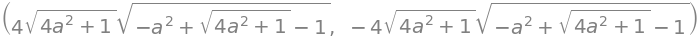

In [5]:
eq_x_1 = eq_x.subs(x,solution1).simplify()
eq_x_2 = eq_x.subs(x,solution2).simplify()
eq_x_1, eq_x_2

1) ПР: $-\sqrt{-a^2 + \sqrt{4a^2 + 1}-1}$ асимптотический устойчива

2) ПР: $\sqrt{-a^2 + \sqrt{4a^2 + 1}-1}$ неустойчива

In [6]:
# Зададим сетку 
amin,amax = -np.sqrt(2), np.sqrt(2)

N = 1500
adiap = np.linspace(amin,amax,N)

solx1 = sym.lambdify(a,solution1,"numpy")
solx2 = sym.lambdify(a,solution2,"numpy")

X1 = solx1(adiap)
X2 = solx2(adiap)

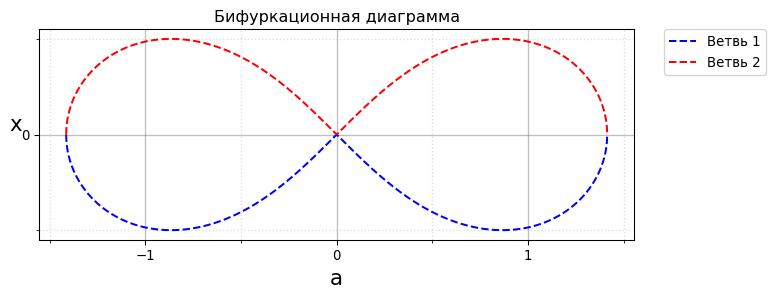

In [7]:
fig=plt.figure(figsize=(8,8),dpi=96)
cplt1=fig.add_subplot(111, aspect='equal',autoscale_on=True)
cplt1.set_xlabel('a', fontsize=16)
cplt1.set_ylabel('x', fontsize=16, rotation=0)
major_ticks = np.arange(-2, 3, 1)
minor_ticks = np.arange(-1.5, 3, 1)
#cplt1.set_ylim([ymin,ymax])
cplt1.set_title("Бифуркационная диаграмма")
cplt1.set_xticks(major_ticks)
cplt1.set_xticks(minor_ticks, minor=True)
cplt1.set_yticks(major_ticks)
cplt1.set_yticks(minor_ticks, minor=True)
cplt1.grid(which='major',color="grey",linestyle='-',lw=1,alpha=0.5)
cplt1.grid(which='minor',color="grey",linestyle=':',lw=1,alpha=0.25)
cplt1.set_aspect('equal')

cplt1.plot(adiap,X1,'b--', label = "Ветвь 1")
cplt1.plot(adiap,X2,'r--', label = "Ветвь 2")
cplt1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

а - точка бифуркаций

Бифуркация типа седло-узел

при $a \in [-\sqrt{2}, \sqrt{2}]$ получаем одно устойчивое, одно неустойчивое равновесие

при $a \notin [-\sqrt{2}, \sqrt{2}]$ нет равновесия, аттрактор исчезает

при a = 0, то x = 0 - неусточиво


2) Найдите устойчивые и неустойчивые многообразия особой точки для линеаризованной и полной системы
$\dot{x_1} = x_2, \dot{x_2} = x_1 + x_1^3$

In [8]:
x1, x2 = symbols('x1 x2')

In [9]:
system = [
    x2,
    x1 + x1**3
]
system

Особые точки нелинейной системы

In [10]:
solve([x2, x1 + x1**3], (x1,x2))

Линеаризуем систему в окрестности (0, 0)

In [11]:
А = sym.Matrix([
    [diff(system[0], x1), diff(system[0], x2)], 
    [diff(system[1], x1), diff(system[1], x2)],
])
А

⎡    0      1⎤
⎢            ⎥
⎢    2       ⎥
⎣3⋅x₁  + 1  0⎦

In [12]:
A1 = А.subs([(x1, 0), (x2, 0)])
A1

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [13]:
eigenvals = []
for key, val in A1.eigenvals().items():
    for i in range(val):
        eigenvals.append(key)
        
eigenvals

(0,0) - гиперболическая особая точка, особая точка – седло; неустойчивый режим. По теореме Гробмана-Хартмана следует, что характер особых точек линеаризованной системы и исходной нелинейной системы совпадает в некоторой окрестности (0,0)

Линеаризуем систему в окрестности (-i, 0), аналогично и для (i, 0)

In [14]:
A2 = А.subs([(x1, -I), (x2, 0)])
A2

⎡0   1⎤
⎢     ⎥
⎣-2  0⎦

In [15]:
eigenvals = []
for key, val in A2.eigenvals().items():
    for i in range(val):
        eigenvals.append(key)
        
eigenvals

($\pm i$,0) - негиперболическая особая точка, для линейной системы особая точка – седло; устойчивый режим. Рассмотрим фазовый портрет нелинейной системы

In [16]:
x1min,x1max = -6,6
x2min,x2max = -6,6
X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 30), np.linspace(x2min, x2max, 30))
dotx1 = sym.lambdify([x1,x2],system[0],'numpy')
dotx2 = sym.lambdify([x1,x2],system[1],'numpy')

dx1 = dotx1(X1,X2)
dx2 = dotx2(X1,X2)

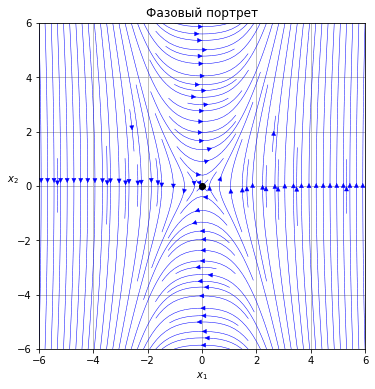

In [17]:
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(1,1,1)

ax2.plot(0,0,'ko')
ax2.streamplot(X1, X2, dx1, dx2, color='b', linewidth=0.5, density=1.8)
ax2.axis('square')
ax2.axis([x1min, x1max, x2min, x2max])
ax2.grid()
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$",rotation=False)
ax2.set_title("Фазовый портрет")
plt.show()